In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
from sympy.plotting import plot as symplot
import sympy as sp

In [37]:
def brownian_motion(mu_func, sigma_func, t_end, steps, y_init):
    
    dt = float(t_end) / steps
    ts = np.arange(0, t_end, dt)
    ys = np.zeros(steps) 
    ys[0] = y_init
    
    def dW(delta_t):

        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
      
    for i in range(1, ts.size):
 
        t = (i-1) * dt
        y = ys[i-1]
        ys[i] = y + mu_func(t) * dt + sigma_func(t)* dW(dt)

    return ts, ys

<function matplotlib.pyplot.show(*args, **kw)>

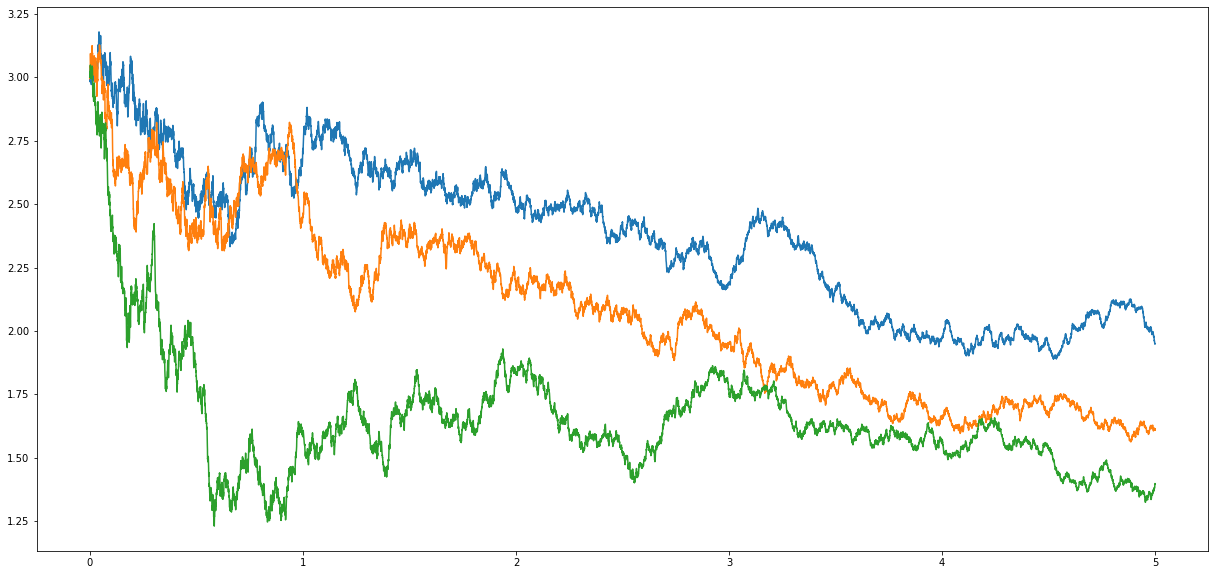

In [46]:
num_sims2 = 3
fig = plt.figure(figsize=(21, 10)) 
for _ in range(num_sims2):
    x_value, y_value = brownian_motion(lambda x: 0, lambda x: 1/(x+1), 5, 10000,3)
    plt.plot(x_value, y_value)
    
plt.show

In [39]:
def hitting_time(mu_func, sigma_func, t_end, steps, y_init):
    
    x_value, y_value = brownian_motion(mu_func, sigma_func, t_end, steps, y_init)
    i = 0
    
    while y_value[i] > 0 and i < steps-1:
        i += 1
        
    else:
        
        return  i * float(t_end) / steps

In [6]:
h_list = [hitting_time(lambda x: 0, lambda x: 1, 40*np.pi, 1000, 1) for i in range(1000)]
print(h_list)

[2.8902652413026098, 10.555751316061706, 0.6283185307179586, 125.53804243744814, 5.277875658030853, 101.6619382701657, 1.6336281798666923, 2.7646015351590183, 1.3823007675795091, 4.900884539600077, 4.0212385965949355, 5.529203070318037, 3.5185837720205684, 125.53804243744814, 3.015928947446201, 63.460171602513824, 0.7539822368615503, 57.55397741376501, 1.5079644737231006, 3.015928947446201, 1.3823007675795091, 2.0106192982974678, 0.8796459430051421, 1.6336281798666923, 0.5026548245743669, 5.7805304826052195, 0.8796459430051421, 27.77167905773377, 3.3929200658769765, 8.293804605477053, 9.927432785343747, 1.6336281798666923, 5.654866776461628, 1.0053096491487339, 29.405307237600464, 25.50973234714912, 3.015928947446201, 3.64424747816416, 20.860175219836226, 1.5079644737231006, 26.138050877867077, 2.0106192982974678, 1.5079644737231006, 4.775220833456486, 3.015928947446201, 1.8849555921538759, 117.62122895040186, 15.582299561805375, 24.630086404143977, 0.37699111843077515, 37.950439255364

C:\Users\piatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\piatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


(0.0, 290.0)

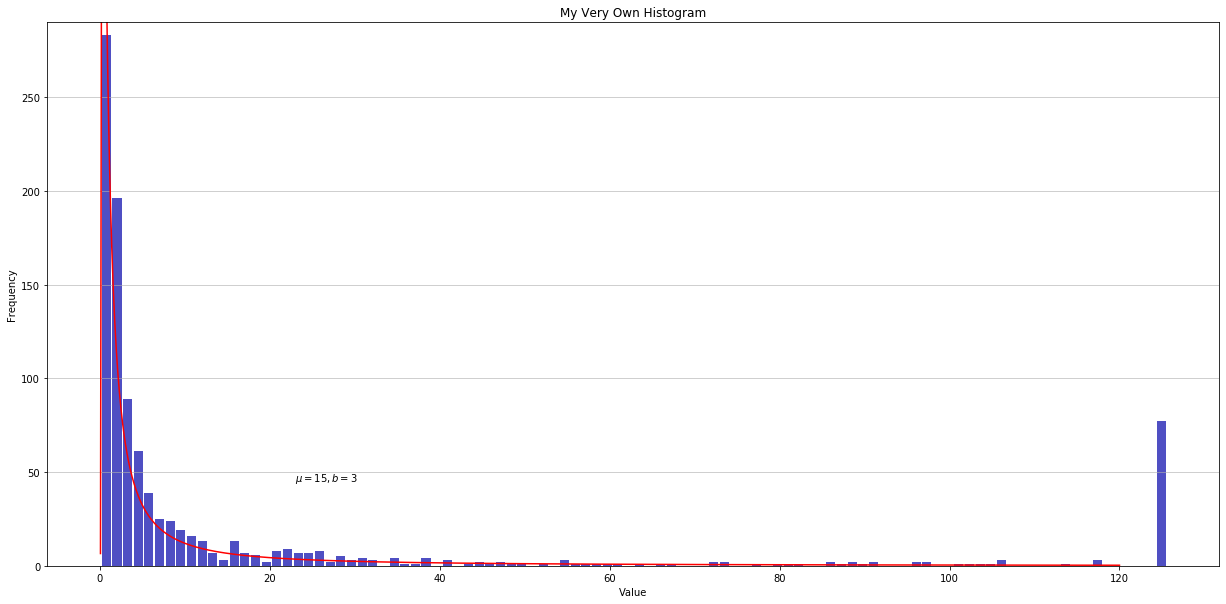

In [14]:
d = np.array(h_list)
n_equal_bins = 100
bin_edges = np.linspace(start=(d.min()), stop=(d.max()), num=n_equal_bins + 1, endpoint=True)

sig = 1
mu = 0
yit = 1
t = symbols('t')

def x(mu,sig,yit,t):
    q= yit/(sig*np.sqrt(2*np.pi*t**3))*np.exp(-(yit+mu*t)**2/(2*sig*t))
    return q

x_vals = np.linspace(0, 120, 2000)
y_vals = 1000*np.array([x(mu,sig,yit,t) for t in x_vals])

fig = plt.figure(figsize=(21, 10)) 
n, bins, patches = plt.hist(x=d, bins=bin_edges, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.plot(x_vals, y_vals, color='red')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [8]:
x_values1 = np.linspace(-10, 10, 1000)
y_values1 = np.linspace(0, 3, 1000)
x1, y1 = np.meshgrid(x_values1,y_values1)

p = 1/(np.sqrt(2*np.pi*y1))*np.exp(-x1**2/(2*y1))

C:\Users\piatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\piatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


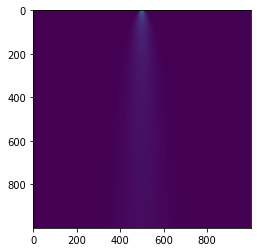

In [9]:
plt.imshow(p)

In [10]:
from pdepy import parabolic

xn, xf, yn, yf = 40, 4.0, 50, 0.5

x = np.linspace(0, xf, xn + 1)
y = np.linspace(0, yf, yn + 1)

init = x ** 2 - 4 * x + 5
bound = 5 * np.exp(-y)

p, q, r, s = 1, 1, -3, 3

axis = x, y
conds = init, bound, bound
params = p, q, r, s

parabolic.solve(axis, params, conds, method="iu")

array([[5.        , 4.95024917, 4.90099337, ..., 3.09391696, 3.06313197,
        3.0326533 ],
       [4.61      , 4.51999746, 4.44598832, ..., 2.75887093, 2.73326651,
        2.7079356 ],
       [4.24      , 4.14303899, 4.05904783, ..., 2.47872336, 2.45738297,
        2.43628966],
       ...,
       [4.24      , 4.20101875, 4.16314089, ..., 2.75732309, 2.73252327,
        2.70795238],
       [4.61      , 4.56431081, 4.52030173, ..., 2.91951572, 2.89184797,
        2.86444696],
       [5.        , 4.95024917, 4.90099337, ..., 3.09391696, 3.06313197,
        3.0326533 ]])

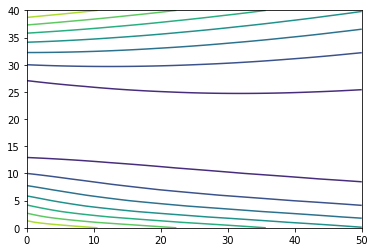

In [11]:
plt.contour(parabolic.solve(axis, params, conds, method="iu"))